## Question 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
def ten_armed_testbed():
    # Initialize
    arms = 10
    epsilon = 0.1
    timestamps = 1000
    episodes = 2000
    rewards = [0 for i in range(0,timestamps)]
    optimal_arm = [0 for i in range(0,timestamps)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = np.random.normal(0,1,10)

        #Step 2 : simulate 10-arm bandit for 1000 timestamps
        Qt = [0.0 for i in range(0,arms)]
        Nt = [0 for i in range(0,arms)]

        for iteration in range (0,timestamps):
            # arm chosen in timestamp t is At
            # corresponding reward is Rt
            # optimal arm is true_At 
            
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)

            # Step 1 : Choose arm
            if np.random.uniform(0,1) < epsilon :
                # choose random arm
                At = np.random.randint(0,arms,dtype=int)
            else:
                # choose greedy arm
                At = np.argmax(Qt)

            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],1)

            # Step 3 : Update Qt, Nt, rewards and optimal_arm_selection
            Nt[At] += 1
            Qt[At] += (Rt-Qt[At])/Nt[At]
            rewards[iteration] += Rt
            if At == true_At:
                optimal_arm[iteration] += 1

    for iteration in range(0, timestamps):
        rewards[iteration] /= episodes
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
    
    return rewards,optimal_arm

In [3]:
def ten_armed_testbed_ucb(c1):
    # Initialize
    arms = 10
    c = c1
    timestamps = 1000
    episodes = 2000
    rewards = [0 for i in range(0,timestamps)]
    optimal_arm = [0 for i in range(0,timestamps)]
    
    for episode in range(0, episodes):
    
        # Step 1 : assign q*(a) for all arms a
        true_q = np.random.normal(0,1,10)

        #Step 2 : simulate 10-arm bandit for 1000 timestamps
        Qt = [0.0 for i in range(0,arms)]
        Nt = [0 for i in range(0,arms)]

        for iteration in range (0,timestamps):
            # arm chosen in timestamp t is At
            # corresponding reward is Rt
            # optimal arm is true_At 
            
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)

            # Step 1 : Choose arm
            flag = 0
            for i in range(0,arms):
                if Nt[i]==0:
                    At = i
                    flag = 1
                    break
                    
            if flag==0:
                At = np.argmax(Qt + c * np.sqrt(np.log((iteration+1))/Nt))
                
            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],1)

            # Step 3 : Update Qt, Nt, rewards and optimal_arm_selection
            Nt[At] += 1
            Qt[At] += (Rt-Qt[At])/Nt[At]
            rewards[iteration] += Rt
            if At == true_At:
                optimal_arm[iteration] += 1

    for iteration in range(0, timestamps):
        rewards[iteration] /= episodes
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
    
    return rewards,optimal_arm

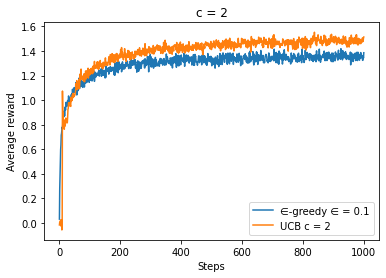

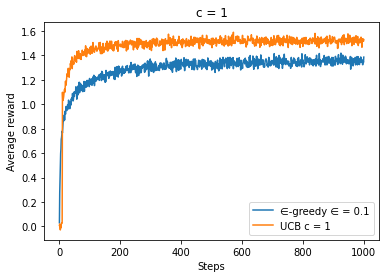

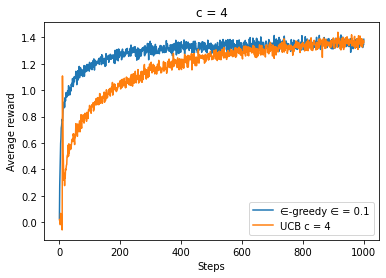

In [4]:
timestamps = 1000
time = [i for i in range(1,timestamps+1)]

rewards1,optimal_arm1 = ten_armed_testbed()
rewards2,optimal_arm2 = ten_armed_testbed_ucb(2)
rewards3,optimal_arm3 = ten_armed_testbed_ucb(1)
rewards4,optimal_arm4 = ten_armed_testbed_ucb(4)

# plotting figure 1 - c = 2
plt.figure()
plt.plot(time, rewards1, label='∈-greedy ∈ = 0.1')
plt.plot(time, rewards2, label='UCB c = 2')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('c = 2')
plt.legend()
plt.show()

# plotting figure 1 - c = 1
plt.figure()
plt.plot(time, rewards1, label='∈-greedy ∈ = 0.1')
plt.plot(time, rewards3, label='UCB c = 1')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('c = 1')
plt.legend()
plt.show()

# plotting figure 1 - c = 4
plt.figure()
plt.plot(time, rewards1, label='∈-greedy ∈ = 0.1')
plt.plot(time, rewards4, label='UCB c = 4')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('c = 4')
plt.legend()
plt.show()

### Justification

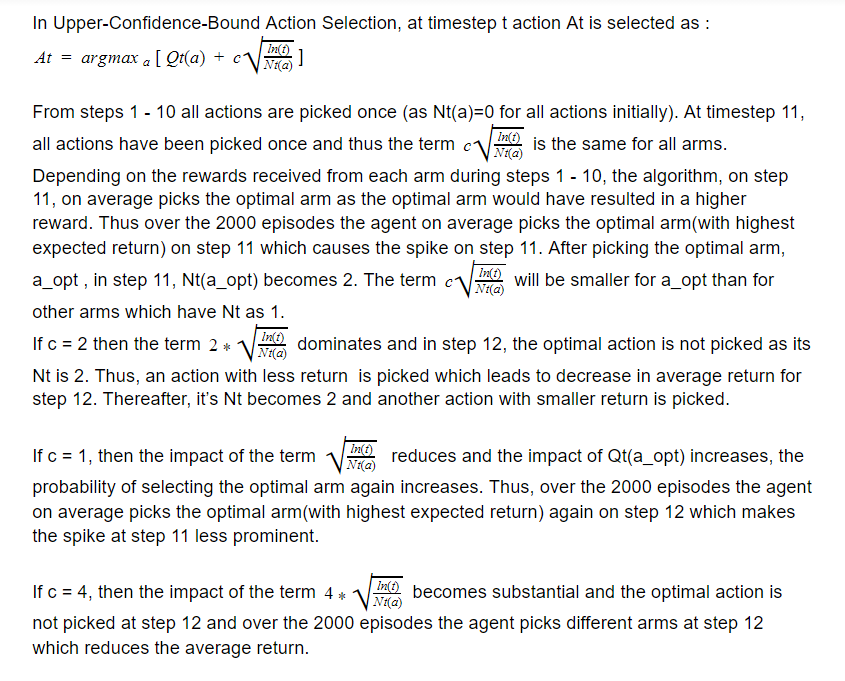

In [2]:
Image(filename='justification_q6.png')